In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
current_directory = os.getcwd()

files_in_directory = os.listdir(current_directory)

df = pd.DataFrame()

for filename in files_in_directory:
    if filename.endswith('.xlsx'):
        file_path = os.path.join(current_directory, filename)
        tempdf = pd.read_excel(file_path)
        df = pd.concat([df, tempdf], ignore_index=True)

In [4]:
tempdf = df.copy()

In [100]:
# df = tempdf.copy()

In [101]:
df = df[(df['state']=='New South Wales')&(df['suburb_name']=='Lane Cove')]

In [102]:
df.drop(columns = ['postcode','state','suburb_name'],inplace = True)

In [103]:
df['type_of_bedrooms'] = df['bedrooms'].astype('str')+'_bed_'+df['type']
df['type_of_bedrooms'].unique()

array(['2_bed_House', '3_bed_House', '4_bed_House', '5_bed_House',
       '1_bed_Unit', '2_bed_Unit', '3_bed_Unit'], dtype=object)

In [104]:
df.drop(columns = ['bedrooms','type'],inplace = True)

In [105]:
for i in df.columns:
  if '2018' in i:
    del df[i]
df.columns

Index(['median_price', 'avg_days_on_market', 'clearance_rate',
       'sold_this_year', 'population', 'average_age', 'owner', 'renter',
       'family', 'single', 'suburb', 'time_stamp', 'rental_median_price',
       'auction_clearance', 'average_days_on_market', 'median_price_2023',
       'growth_rate_2023', 'no_of_sales_2023', 'median_price_2022',
       'growth_rate_2022', 'no_of_sales_2022', 'median_price_2021',
       'growth_rate_2021', 'no_of_sales_2021', 'median_price_2020',
       'growth_rate_2020', 'no_of_sales_2020', 'median_price_2019',
       'growth_rate_2019', 'no_of_sales_2019', 'rental_yield',
       'type_of_bedrooms'],
      dtype='object')

In [106]:
import numpy as np

sub = df['suburb'].unique().tolist()
df = df.dropna(subset=['time_stamp'])

In [107]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], errors='coerce', utc=True)
# df['week'] = df['time_stamp'].dt.isocalendar().week
# df.drop(columns=['time_stamp'],inplace=True)

In [108]:
domdf_list = []
c = ['population', 'average_age', 'renter', 'single', 'suburb', 'time_stamp']

for (time_stamp, suburb), group in df.groupby(['time_stamp', 'suburb']):
    type_of_bedrooms_values = group['type_of_bedrooms'].unique()
    
    row_dict = group[c].iloc[0].to_dict()

    for _, row in group.drop(columns=c).iterrows():
        type_of_bedrooms = row['type_of_bedrooms']
        for col, value in row.items():
            if col != 'type_of_bedrooms':
                new_col_name = f'{col}_{type_of_bedrooms}'
                row_dict[new_col_name] = value

    t = pd.DataFrame([row_dict])
    domdf_list.append(t)

df = pd.concat(domdf_list, ignore_index=True)

In [109]:
df.columns

Index(['population', 'average_age', 'renter', 'single', 'suburb', 'time_stamp',
       'median_price_2_bed_House', 'avg_days_on_market_2_bed_House',
       'clearance_rate_2_bed_House', 'sold_this_year_2_bed_House',
       ...
       'median_price_2021_3_bed_Unit', 'growth_rate_2021_3_bed_Unit',
       'no_of_sales_2021_3_bed_Unit', 'median_price_2020_3_bed_Unit',
       'growth_rate_2020_3_bed_Unit', 'no_of_sales_2020_3_bed_Unit',
       'median_price_2019_3_bed_Unit', 'growth_rate_2019_3_bed_Unit',
       'no_of_sales_2019_3_bed_Unit', 'rental_yield_3_bed_Unit'],
      dtype='object', length=181)

In [97]:
df.to_excel('Lane Cove.xlsx',index=False)

PermissionError: [Errno 13] Permission denied: 'Lane Cove.xlsx'

In [96]:
df.describe()

,population,renter,single,median_price_2_bed_House,avg_days_on_market_2_bed_House,clearance_rate_2_bed_House,sold_this_year_2_bed_House,owner_2_bed_House,family_2_bed_House,rental_median_price_2_bed_House,...,median_price_2021_3_bed_Unit,growth_rate_2021_3_bed_Unit,no_of_sales_2021_3_bed_Unit,median_price_2020_3_bed_Unit,growth_rate_2020_3_bed_Unit,no_of_sales_2020_3_bed_Unit,median_price_2019_3_bed_Unit,growth_rate_2019_3_bed_Unit,no_of_sales_2019_3_bed_Unit,rental_yield_3_bed_Unit
count,189.0,189.0,189.0,2.900000e+01,0.0,11.000000,29.000000,27.0,27.0,29.000000,...,2.900000e+01,29.000000,29.000000,2.900000e+01,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000
mean,10817.0,37.0,50.0,1.546759e+06,NaN,91.818182,11.896552,63.0,50.0,669.206897,...,1.367345e+06,12.262069,27.586207,1.220931e+06,17.089655,18.275862,1.043034e+06,-26.227586,31.965517,0.692414
std,0.0,0.0,0.0,7.786878e+04,NaN,4.045199,1.113066,0.0,0.0,112.599600,...,1.722597e+04,5.509953,3.831423,5.980201e+04,6.024079,3.797523,2.247297e+04,2.168096,1.451176,0.127129
min,10817.0,37.0,50.0,1.500000e+06,NaN,90.000000,11.000000,63.0,50.0,90.000000,...,1.350000e+06,3.000000,20.000000,1.120000e+06,2.800000,12.000000,1.019000e+06,-29.200000,30.000000,0.060000
25%,10817.0,37.0,50.0,1.500000e+06,NaN,90.000000,11.000000,63.0,50.0,673.000000,...,1.350000e+06,8.900000,25.000000,1.198000e+06,15.500000,15.000000,1.036000e+06,-27.300000,31.000000,0.690000
50%,10817.0,37.0,50.0,1.500000e+06,NaN,90.000000,12.000000,63.0,50.0,685.000000,...,1.381000e+06,11.400000,29.000000,1.240000e+06,16.900000,18.000000,1.037000e+06,-25.900000,33.000000,0.710000
75%,10817.0,37.0,50.0,1.600000e+06,NaN,90.000000,12.000000,63.0,50.0,708.000000,...,1.381000e+06,12.700000,30.000000,1.240000e+06,19.600000,21.000000,1.037000e+06,-25.600000,33.000000,0.750000
max,10817.0,37.0,50.0,1.714000e+06,NaN,100.000000,15.000000,63.0,50.0,708.000000,...,1.390000e+06,23.800000,33.000000,1.350000e+06,25.000000,26.000000,1.123000e+06,-19.800000,34.000000,0.780000


In [94]:
for i in df.columns:
    print(i)

population
average_age
renter
single
suburb
time_stamp
median_price_2_bed_House
avg_days_on_market_2_bed_House
clearance_rate_2_bed_House
sold_this_year_2_bed_House
owner_2_bed_House
family_2_bed_House
rental_median_price_2_bed_House
auction_clearance_2_bed_House
average_days_on_market_2_bed_House
median_price_2023_2_bed_House
growth_rate_2023_2_bed_House
no_of_sales_2023_2_bed_House
median_price_2022_2_bed_House
growth_rate_2022_2_bed_House
no_of_sales_2022_2_bed_House
median_price_2021_2_bed_House
growth_rate_2021_2_bed_House
no_of_sales_2021_2_bed_House
median_price_2020_2_bed_House
growth_rate_2020_2_bed_House
no_of_sales_2020_2_bed_House
median_price_2019_2_bed_House
growth_rate_2019_2_bed_House
no_of_sales_2019_2_bed_House
rental_yield_2_bed_House
median_price_3_bed_House
avg_days_on_market_3_bed_House
clearance_rate_3_bed_House
sold_this_year_3_bed_House
owner_3_bed_House
family_3_bed_House
rental_median_price_3_bed_House
auction_clearance_3_bed_House
average_days_on_market_3_be

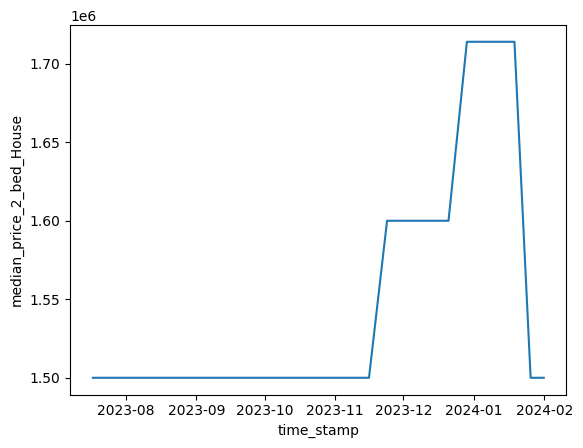

In [116]:
sns.lineplot(x = 'time_stamp',y = 'median_price_2_bed_House', data = df)
plt.show()